

# ARIMA and Seasonal ARIMA


## AutoRegressive Integrated Moving Averages : ARIMA 

The general process for ARIMA models is the following:
 
* Get the Data (and format it)
* Visualize the Time Series Data
* Testing for Stationarity

* Make the time series data stationary

* Construct the ARIMA Model
* Use the model to make predictions
* Metric for performance evaluation 


Let's go through these steps!

* Now that we introduce the essential concepts for characterizing the probability structure of a time series, we will proceed to explore these characteristics empirically.

* Specifically, we will use *time series plot, histogram (and its variants), plot of sample autocorrelation, and plot of sample partial autocorrelation}* to examine a given time series. 

* These visuals play a very crucial role in the $\textit{Box-Jenkins approach}$ to ARIMA modeling.

In [1]:
!pip install pmdarima

## Importation packages 

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## Get the Data (and format it)


In [3]:
#import dataset and format date 
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('TCS.NS.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-04,1190.000000,1190.000000,1174.775024,1178.775024,1052.039429,1512966
2016-03-08,1171.050049,1183.500000,1152.099976,1177.150024,1050.588989,1268152
2016-03-09,1170.500000,1184.699951,1147.574951,1178.625000,1051.905273,2017784
2016-03-10,1178.025024,1179.925049,1157.474976,1174.150024,1047.911621,1661666
2016-03-11,1170.000000,1195.425049,1167.500000,1182.625000,1055.475098,1530528
...,...,...,...,...,...,...
2022-02-24,3474.000000,3483.850098,3391.100098,3401.649902,3401.649902,5039136
2022-02-25,3468.000000,3530.000000,3462.000000,3520.750000,3520.750000,2549723
2022-02-28,3490.000000,3563.750000,3455.899902,3554.199951,3554.199951,3288942


<AxesSubplot:xlabel='Date'>

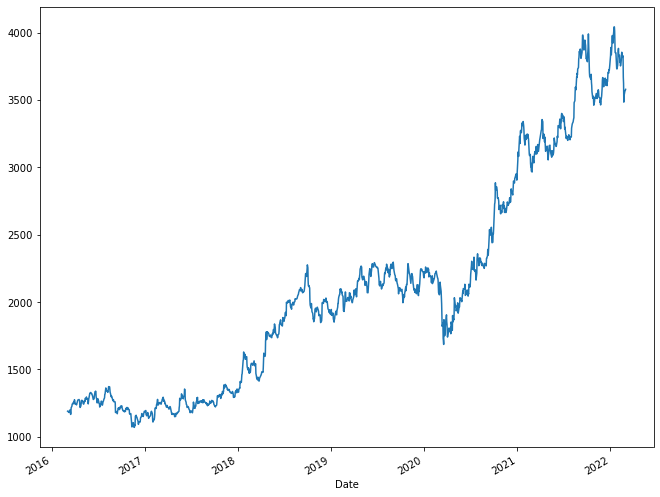

In [23]:
data["High"].plot()

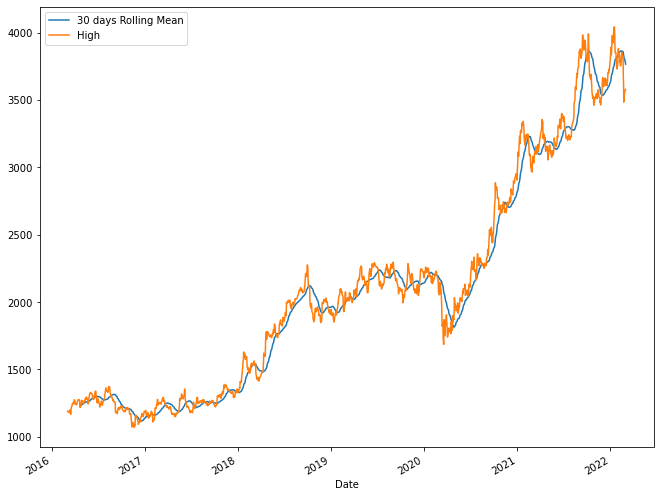

In [27]:
data["High"].rolling(30).mean().plot(label='30 days Rolling Mean')
data["High"].plot()
plt.legend()

<AxesSubplot:xlabel='Date'>

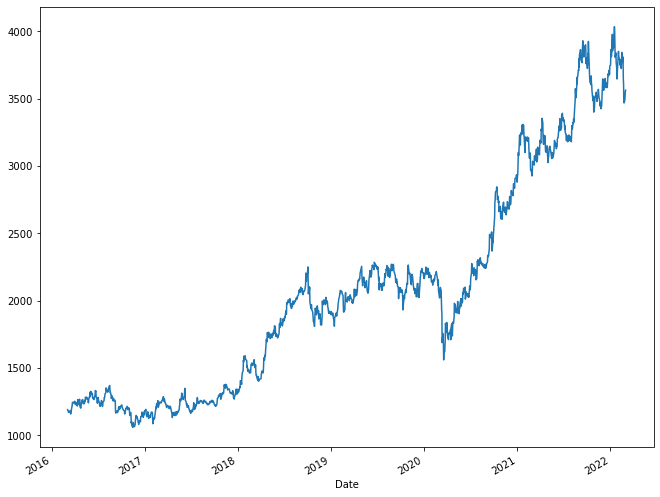

In [24]:
data["Open"].plot()

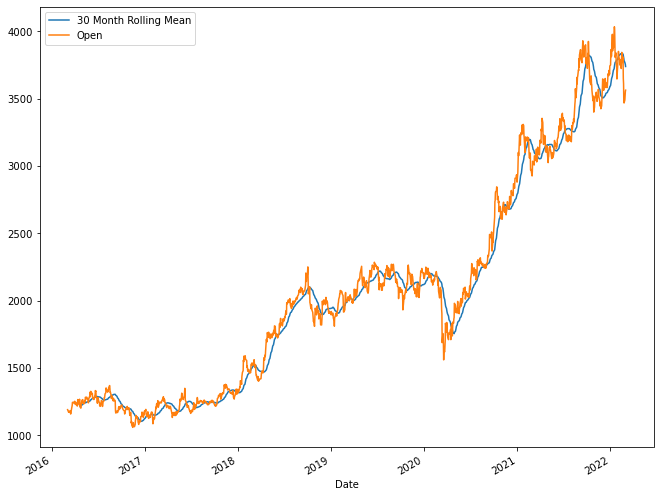

In [28]:
data["Open"].rolling(30).mean().plot(label='30 Month Rolling Mean')
data["Open"].plot()
plt.legend()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2016-03-04 to 2022-03-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1480 non-null   float64
 1   High       1480 non-null   float64
 2   Low        1480 non-null   float64
 3   Close      1480 non-null   float64
 4   Adj Close  1480 non-null   float64
 5   Volume     1480 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.9 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1480.0,2.069634e+03,7.983493e+02,1058.449951,1.290188e+03,1.998950e+03,2.319750e+03,4.033950e+03
High,1480.0,2.091270e+03,8.049669e+02,1070.000000,1.304356e+03,2.015950e+03,2.350875e+03,4.043000e+03
Low,1480.0,2.046774e+03,7.902114e+02,1025.949951,1.279025e+03,1.978100e+03,2.290900e+03,3.980000e+03
Close,1480.0,2.068723e+03,7.970600e+02,1050.574951,1.289987e+03,2.000200e+03,2.327200e+03,4.019150e+03
Adj Close,1480.0,1.986612e+03,8.322673e+02,952.353394,1.178066e+03,1.889688e+03,2.288229e+03,4.012100e+03
Volume,1480.0,2.976092e+06,2.890587e+06,86822.000000,1.790156e+06,2.468531e+06,3.454724e+06,8.806715e+07


## Visualize the Data

Let's visualize this data with a few methods.

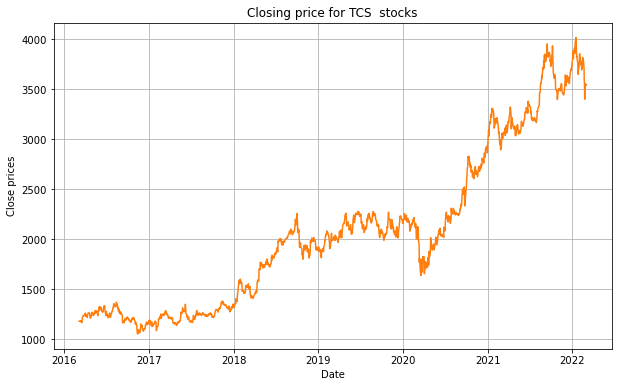

In [7]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.plot(data['Close'],color ='tab:orange')
plt.title('Closing price for TCS  stocks')
plt.show()

<AxesSubplot:ylabel='Density'>

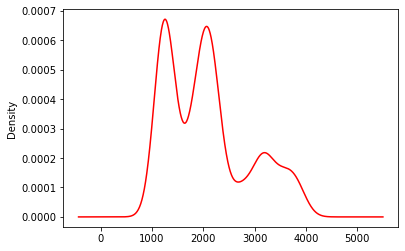

In [8]:
#Distribution of close variable 
variable_close = data['Close']
variable_close.plot(kind='kde', color='red')



## Testing for Stationarity

In [9]:
result = adfuller(variable_close)
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.16052722000597477
p-value : 0.9430660170833622
#Lags Used : 0
Number of Observations Used : 1479
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 



In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

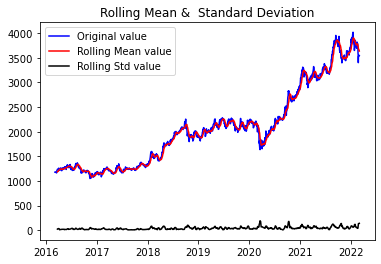

Augmented Dickey-Fuller Test Results 
Test Statistics               -0.160527
P-value                        0.943066
No. of lags used               0.000000
No. of observations used    1479.000000
critical value (1%)           -3.434779
critical value (5%)           -2.863496
critical value (10%)          -2.567811
dtype: float64


In [10]:
# function for test for staionarity in time serie variable 
def test_stationarity(timeseries):
    #Determing rolling statistics
    
    mean_rol = timeseries.rolling(12).mean()
    std_rol = timeseries.rolling(12).std()
    
    #Plot rolling statistics
    
    
    plt.plot(timeseries, color='blue',label='Original value')
    plt.plot(mean_rol, color='red', label='Rolling Mean value')
    plt.plot(std_rol, color='black', label = 'Rolling Std value')
    plt.legend(loc='best')
    plt.title('Rolling Mean &  Standard Deviation')
    plt.show(block=False)
    print("Augmented Dickey-Fuller Test Results ")
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    
    output = pd.Series(adft[0:4],index=['Test Statistics','P-value','No. of lags used','No. of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
#Apply test_stationarity for variable_close variable 
test_stationarity(variable_close)

## Decomposition

ETS decomposition allows us to see the individual parts!

<Figure size 432x288 with 0 Axes>

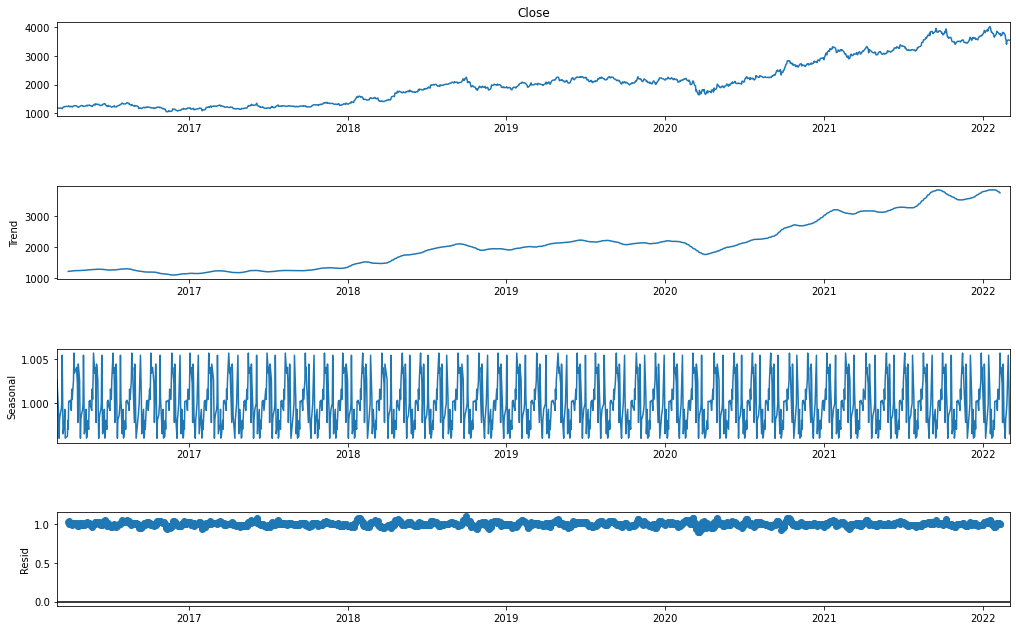

In [11]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(variable_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 10)

No handles with labels found to put in legend.


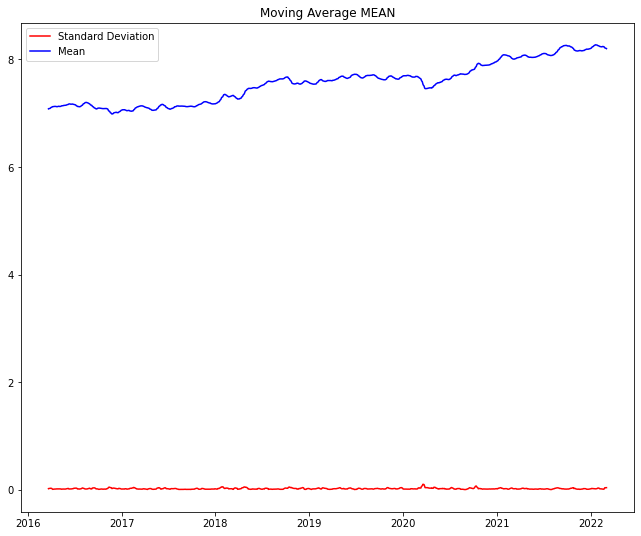

In [12]:
#if not stationary then eliminate trend
#Eliminate trend

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
close_log = np.log(variable_close)
moving_avg = close_log.rolling(12).mean()

std_dev = close_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average MEAN')
plt.plot(std_dev, color ="red", label = "Standard Deviation")
plt.plot(moving_avg, color="blue", label = "Mean")
plt.legend()
plt.show()

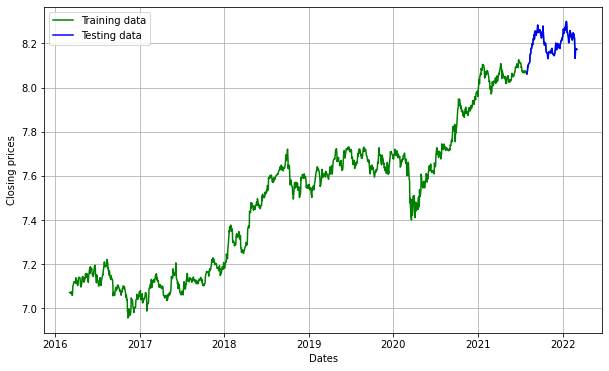

In [13]:
#split data into train and training set


train, test = close_log[3:int(len(close_log)*0.9)], close_log[int(len(close_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(close_log, 'green', label='Training data')
plt.plot(test, 'blue', label='Testing data')
plt.legend()

## Using the Seasonal ARIMA model

Finally we can use our ARIMA model now that we have an understanding of our data!

In [14]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

### p,d,q parameters

* p: The number of lag observations included in the model.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7197.354, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7197.160, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7197.282, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7196.436, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7195.992, Time=0.99 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.798 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1329
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3600.677
Date:                Thu, 07 Apr 2022   AIC                          -7197.354
Time:                        21:42:56   BIC                          -7186.971
Sample:                             0   HQIC                         -7193.462
                               - 1329                                  

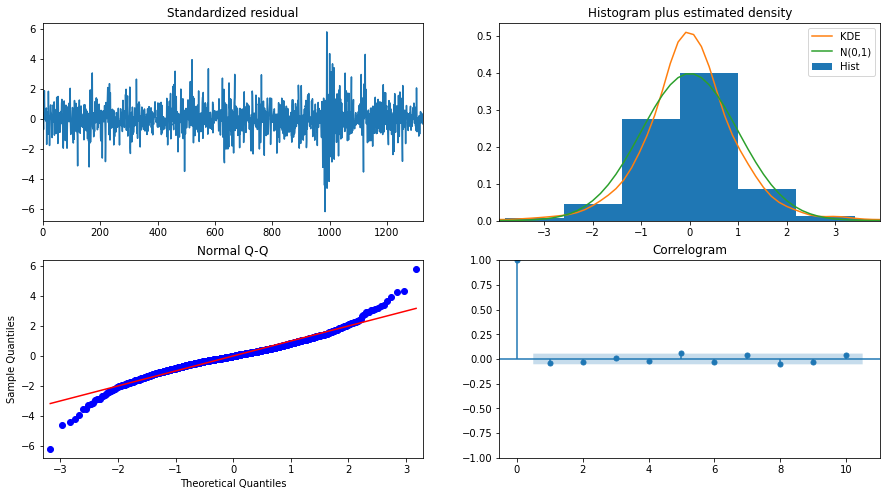

In [15]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,             
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [16]:
#Modeling
# Build Model
model = ARIMA(train, order=(1,1,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/Users/garbamoussa/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/garbamoussa/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1328
Model:                 ARIMA(1, 1, 2)   Log Likelihood                3604.176
Method:                       css-mle   S.D. of innovations              0.016
Date:                Thu, 07 Apr 2022   AIC                          -7198.352
Time:                        21:42:57   BIC                          -7172.395
Sample:                             1   HQIC                         -7188.623
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0008      0.000      1.819      0.069   -5.82e-05       0.002
ar.L1.D.Close    -0.7411      0.129     -5.736      0.000      -0.994      -0.488
ma.L1.D.Close     0.7067      0.131     

## Prediction of Future Values

Firts we can get an idea of how well our model performs by just predicting for values that we actually already know:

In [17]:
# Forecast
fc, se, conf = fitted.forecast(148, alpha=0.05)  # 95% conf

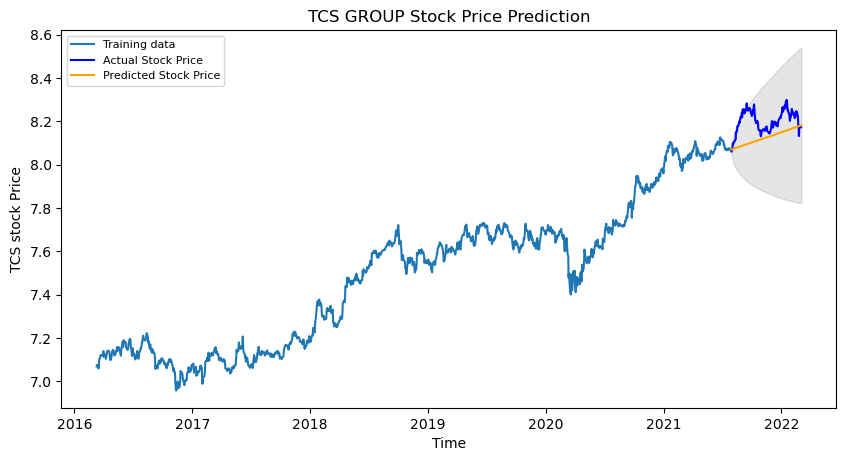

In [20]:

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='Training data')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('TCS GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


## Metric for performance evaluation 

In [22]:
# report performance
mse = mean_squared_error(test, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 0.008516088732447163
MAE: 0.07885859491053876
RMSE: 0.09228265672620811
MAPE: 0.009585945426470925
